In [1]:
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_APT = pd.read_csv('/content/drive/MyDrive/Isolation_Forest_Data/data_APT.csv', encoding='utf-8')
data_APT.info()
data_APT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000661 entries, 0 to 1000660
Data columns (total 46 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Floor                            1000661 non-null  float64
 1   Building_Age                     1000661 non-null  int64  
 2   JS_BA                            1000661 non-null  float64
 3   Population                       1000661 non-null  int64  
 4   IR                               1000661 non-null  float64
 5   UR                               1000661 non-null  float64
 6   LC_index                         1000661 non-null  float64
 7   CA_index                         1000661 non-null  float64
 8   TC_index                         1000661 non-null  float64
 9   SDT_index                        1000661 non-null  float64
 10  HSP_index                        1000661 non-null  float64
 11  Crime_Rates                      1000661 non-null 

,Floor,Building_Age,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,...,Region_성동구,Region_성북구,Region_송파구,Region_양천구,Region_영등포구,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구
0,4.0,8,95.73,557563,2.75,3.371603,75.893532,82.497063,79.812584,104.547226,...,0,0,0,0,0,0,0,0,0,0
1,19.0,5,63.09,557563,2.75,3.371603,75.893433,82.497063,79.812469,104.547226,...,0,0,0,0,0,0,0,0,0,0
2,9.0,5,67.50,557563,2.75,3.371603,75.893394,82.497063,79.812469,104.547226,...,0,0,0,0,0,0,0,0,0,0
3,5.0,6,129.18,557563,2.75,3.371603,75.893532,82.497063,79.812347,104.547226,...,0,0,0,0,0,0,0,0,0,0
4,1.0,6,59.61,557563,2.75,3.371603,75.894302,82.496399,79.813103,104.547226,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000656,1.0,27,49.77,384272,3.50,2.699322,109.782448,110.263451,113.675888,82.661346,...,0,0,0,0,0,0,0,0,0,1
1000657,13.0,26,59.76,384272,3.50,2.699322,109.783394,110.265808,113.678146,82.661346,...,0,0,0,0,0,0,0,0,0,1
1000658,10.0,27,49.77,384272,3.50,2.699322,109.782448,110.263451,113.675888,82.661346,...,0,0,0,0,0,0,0,0,0,1
1000659,5.0,27,39.84,384272,3.50,2.699322,109.782448,110.263451,113.675888,82.661346,...,0,0,0,0,0,0,0,0,0,1


In [4]:
columns_to_drop = ['UR', 'HSP_index', 'CA_index', 'TC_index']
data_APT = data_APT.drop(columns = columns_to_drop)
data_APT

,Floor,Building_Age,JS_BA,Population,IR,LC_index,SDT_index,Crime_Rates,latitude,longitude,...,Region_성동구,Region_성북구,Region_송파구,Region_양천구,Region_영등포구,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구
0,4.0,8,95.73,557563,2.75,75.893532,104.547226,1.386371,37.502593,127.031140,...,0,0,0,0,0,0,0,0,0,0
1,19.0,5,63.09,557563,2.75,75.893433,104.547226,1.386371,37.485309,127.034404,...,0,0,0,0,0,0,0,0,0,0
2,9.0,5,67.50,557563,2.75,75.893394,104.547226,1.386371,37.485309,127.034404,...,0,0,0,0,0,0,0,0,0,0
3,5.0,6,129.18,557563,2.75,75.893532,104.547226,1.386371,37.506861,127.028750,...,0,0,0,0,0,0,0,0,0,0
4,1.0,6,59.61,557563,2.75,75.894302,104.547226,1.386371,37.498777,127.049879,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000656,1.0,27,49.77,384272,3.50,109.782448,82.661346,1.086769,37.615262,127.091014,...,0,0,0,0,0,0,0,0,0,1
1000657,13.0,26,59.76,384272,3.50,109.783394,82.661346,1.086769,37.597149,127.081907,...,0,0,0,0,0,0,0,0,0,1
1000658,10.0,27,49.77,384272,3.50,109.782448,82.661346,1.086769,37.615262,127.091014,...,0,0,0,0,0,0,0,0,0,1
1000659,5.0,27,39.84,384272,3.50,109.782448,82.661346,1.086769,37.615262,127.091014,...,0,0,0,0,0,0,0,0,0,1


Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.186189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2894
[LightGBM] [Info] Number of data points in the train set: 800528, number of used features: 41
[LightGBM] [Info] Start training from score 72503.390971
Best parameters found:  {'reg_lambda': 0, 'reg_alpha': 1, 'num_leaves': 128, 'n_estimators': 1500, 'max_depth': -1, 'learning_rate': 0.1}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2894
[LightGBM] [Info] Number of data points in the train set: 800528, number of used features: 41
[LightGBM] [Info] Start training from score 72503.390971
Mean Absolute Error (MAE): 4307.066232390577
Root Mean Squared Error (RMSE): 7197.3025447309055
Mean Absolute Percentage Error (MAPE): 6.941562589191111
R-Squared

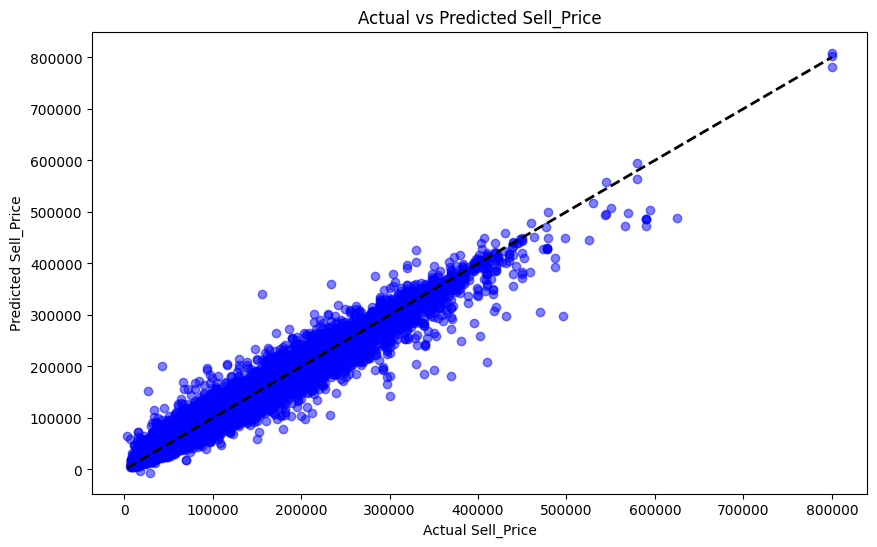

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

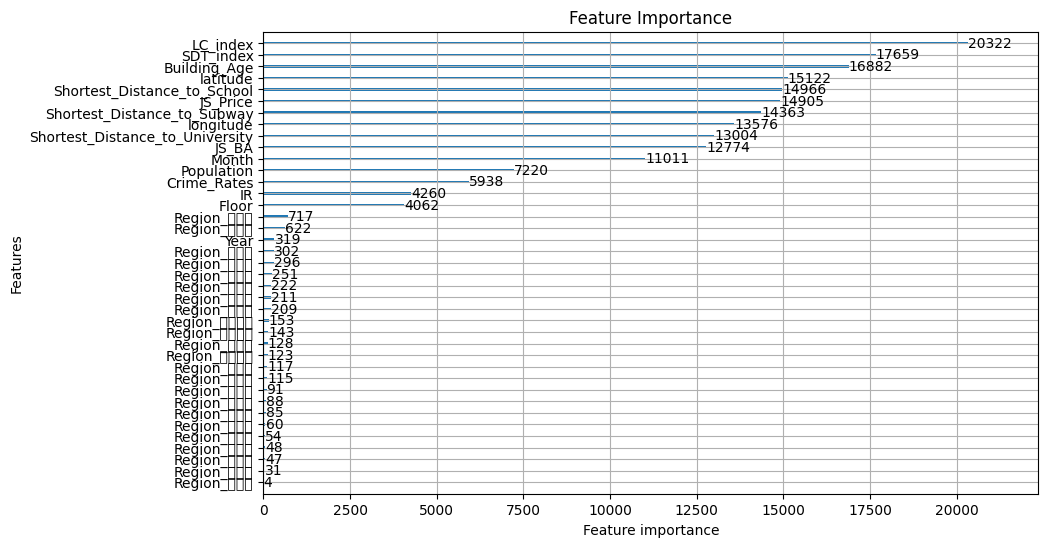

In [5]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (assuming you have already loaded it into a DataFrame called 'df')
# Replace 'df' with your actual DataFrame name
df = data_APT

# Split the data into features (X) and target variable (y)
X = df.drop("Sell_Price", axis=1)
y = df["Sell_Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=283)

# Set hyperparameters for LightGBM model (adjust these based on your requirements)
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt'
    # Add other hyperparameters as per your requirement
}

# Create LightGBM dataset for training only
train_data = lgb.Dataset(X_train, label=y_train)

# Perform RandomizedSearchCV for hyperparameter tuning
model_lgb = lgb.LGBMRegressor()
random_grid = {
    'n_estimators': (300, 1500),
    'learning_rate': (0.01, 0.1),
    'num_leaves': (32, 128),
    'max_depth': (-1, 15),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1)

}
rscv = RandomizedSearchCV(estimator=model_lgb,
                          param_distributions=random_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_iter=100,
                          n_jobs=-1,
                          verbose=1,
                          random_state=742)

rscv.fit(X_train, y_train)

print("Best parameters found: ", rscv.best_params_)

# Train the model using LightGBM with best parameters
model = lgb.LGBMRegressor(**params, **rscv.best_params_)
model.fit(X_train, y_train)

# Make predictions on the testing set using trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics: MAE (Mean Absolute Error), RMSE (Root Mean Squared Error),
# MAPE (Mean Absolute Percentage Error), R-Squared

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-Squared:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sell_Price')
plt.ylabel('Predicted Sell_Price')
plt.title('Actual vs Predicted Sell_Price')
plt.show()



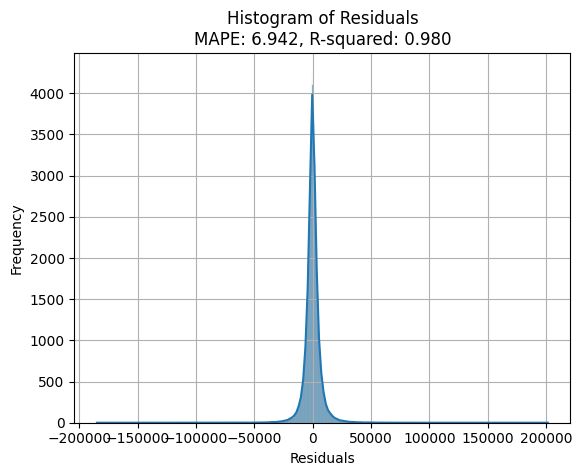

In [7]:
import seaborn as sns


# Create a histogram of residuals with MAE and MAPE
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals\nMAPE: {:.3f}, R-squared: {:.3f}".format(mape, r2))
plt.grid(True)

In [8]:
sample_size = 100000
data_APT_sample = data_APT.sample(n=sample_size, random_state=384)
data_APT_sample


,Floor,Building_Age,JS_BA,Population,IR,LC_index,SDT_index,Crime_Rates,latitude,longitude,...,Region_성동구,Region_성북구,Region_송파구,Region_양천구,Region_영등포구,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구
438195,16.0,2,84.98,490515,1.50,85.400000,121.310376,0.944132,37.612947,126.933257,...,0,0,0,0,0,0,1,0,0,0
557928,5.0,21,84.96,148098,1.25,91.000000,107.471264,2.469910,37.586131,126.998728,...,0,0,0,0,0,0,0,1,0,0
947807,9.0,34,66.56,504265,1.75,108.400000,94.396386,0.782068,37.663056,127.060031,...,0,0,0,0,0,0,0,0,0,0
63543,5.0,11,59.64,486546,3.25,74.507584,74.599930,0.947923,37.552396,127.125815,...,0,0,0,0,0,0,0,0,0,0
528590,23.0,1,84.88,433809,1.25,90.000000,108.428950,0.967620,37.558949,127.147083,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483118,4.0,28,56.76,475845,1.25,87.100000,115.876565,0.853386,37.513036,126.861133,...,0,0,0,1,0,0,0,0,0,0
388325,13.0,32,73.26,567007,1.75,83.700000,120.348837,1.481195,37.488876,127.071668,...,0,0,0,0,0,0,0,0,0,0
95246,9.0,8,84.98,484742,3.25,74.508003,75.119751,0.947923,37.556579,127.138852,...,0,0,0,0,0,0,0,0,0,0
868939,1.0,2,84.98,662838,0.50,103.100000,133.526430,0.802759,37.497519,127.107226,...,0,0,1,0,0,0,0,0,0,0


# Save the trained model

In [ ]:
import lightgbm as lgb
import joblib

# Train the LightGBM model as you did before
# ...

# Save the trained model to a file
model_filename = "lgb_model.pkl"
joblib.dump(model, model_filename)

# You can also save the column names of your features if needed
column_names_filename = "column_names.pkl"
joblib.dump(X.columns, column_names_filename)


# Load the trained model and make actual predictions

In [ ]:
import lightgbm as lgb
import joblib
import pandas as pd

# Load the saved model
model_filename = "lgb_model.pkl"
model = joblib.load(model_filename)

# Load the column names if needed
column_names_filename = "column_names.pkl"
column_names = joblib.load(column_names_filename)

# Create a new DataFrame with your independent features for prediction
new_data = pd.DataFrame({
    'Feature1': [value1],
    'Feature2': [value2],
    # Add more features as needed
})

# Make predictions using the loaded model
predictions = model.predict(new_data)

# The 'predictions' variable now contains the predicted 'Sell_Price' values for the new data
print(predictions)


In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you have already loaded it into a DataFrame called 'df')
# Replace 'df' with your actual DataFrame name
df = data_APT_sample

# Split the data into features (X) and target variable (y)
X = df.drop("Sell_Price", axis=1)
y = df["Sell_Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=283)

# Set hyperparameters for XGBoost model (adjust these based on your requirements)
params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    # Add other hyperparameters as per your requirement
}

# Perform RandomizedSearchCV for hyperparameter tuning
model_xgb = xgb.XGBRegressor()
random_grid = {
    'n_estimators': (300, 1500),
    'learning_rate': (0.01, 0.1),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'gamma': (0, 1),
    'subsample': (0.6, 1),
    'colsample_bytree': (0.6, 1),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1)
}

rscv = RandomizedSearchCV(estimator=model_xgb,
                          param_distributions=random_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_iter=100,
                          n_jobs=-1,
                          verbose=1,
                          random_state=742)

rscv.fit(X_train, y_train)

print("Best parameters found: ", rscv.best_params_)

# Train the model using XGBoost with best parameters
model = xgb.XGBRegressor(**params, **rscv.best_params_)
model.fit(X_train, y_train)

# Make predictions on the testing set using trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics: MAE (Mean Absolute Error), RMSE (Root Mean Squared Error),
# MAPE (Mean Absolute Percentage Error), R-Squared

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-Squared:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sell_Price')
plt.ylabel('Predicted Sell_Price')
plt.title('Actual vs Predicted Sell_Price')
plt.show()

# Create a histogram of residuals with MAE and MAPE
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals\nMAPE: {:.3f}, R-squared: {:.3f}".format(mape, r2))
plt.grid(True)


NameError: name 'data_APT_sample' is not defined